## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [718]:
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Data Preparation

In [719]:
# Your code here - remember to use markdown cells for comments as well!
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0000,3,1.0000,1180,5650,1.0000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0000,98178,47.5112,-122.2570,1340,5650
1,6414100192,12/9/2014,538000.0000,3,2.2500,2570,7242,2.0000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0000,98125,47.7210,-122.3190,1690,7639
2,5631500400,2/25/2015,180000.0000,2,1.0000,770,10000,1.0000,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.7379,-122.2330,2720,8062
3,2487200875,12/9/2014,604000.0000,4,3.0000,1960,5000,1.0000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0000,98136,47.5208,-122.3930,1360,5000
4,1954400510,2/18/2015,510000.0000,3,2.0000,1680,8080,1.0000,NO,NONE,Average,8 Good,1680,0.0,1987,0.0000,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0000,3,2.5000,1530,1131,3.0000,NO,NONE,Average,8 Good,1530,0.0,2009,0.0000,98103,47.6993,-122.3460,1530,1509
21593,6600060120,2/23/2015,400000.0000,4,2.5000,2310,5813,2.0000,NO,NONE,Average,8 Good,2310,0.0,2014,0.0000,98146,47.5107,-122.3620,1830,7200
21594,1523300141,6/23/2014,402101.0000,2,0.7500,1020,1350,2.0000,NO,NONE,Average,7 Average,1020,0.0,2009,0.0000,98144,47.5944,-122.2990,1020,2007
21595,291310100,1/16/2015,400000.0000,3,2.5000,1600,2388,2.0000,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0000,98027,47.5345,-122.0690,1410,1287


In [720]:
df.duplicated().sum()


0

In [721]:
duplicates = df[df['id'].duplicated()]
print(len(duplicates))

177


In [722]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [723]:
df.loc[(df['id'] == 795000620 ) | 
      (df['id'] == 1825069031)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0000,4,1.7500,2410,8447,2.0000,NO,GOOD,Good,8 Good,2060,350.0,1936,1980.0000,98074,47.6499,-122.0880,2520,14789
3947,1825069031,10/16/2014,550000.0000,4,1.7500,2410,8447,2.0000,NaN,GOOD,Good,8 Good,2060,350.0,1936,1980.0000,98074,47.6499,-122.0880,2520,14789
17588,795000620,9/24/2014,115000.0000,3,1.0000,1080,6250,1.0000,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0000,98168,47.5045,-122.3300,1070,6250
17589,795000620,12/15/2014,124000.0000,3,1.0000,1080,6250,1.0000,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0000,98168,47.5045,-122.3300,1070,6250
17590,795000620,3/11/2015,157000.0000,3,1.0000,1080,6250,1.0000,NaN,NONE,Fair,5 Fair,1080,0.0,1950,nan,98168,47.5045,-122.3300,1070,6250


In [724]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [726]:
training_data_ori = df.sample(frac = 0.75, random_state=25)
x_train_ori = training_data_ori.drop('price', axis=1)
y_train_ori = training_data_ori['price']

testing_data_ori = df.drop(training_data_ori.index)
x_test_ori = testing_data_ori.drop('price', axis =1)
y_test_ori = testing_data_ori['price']

In [727]:
df_copy = df.copy()
df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0000,3,1.0000,1180,5650,1.0000,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0000,98178,47.5112,-122.2570,1340,5650
1,6414100192,12/9/2014,538000.0000,3,2.2500,2570,7242,2.0000,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0000,98125,47.7210,-122.3190,1690,7639
2,5631500400,2/25/2015,180000.0000,2,1.0000,770,10000,1.0000,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.7379,-122.2330,2720,8062
3,2487200875,12/9/2014,604000.0000,4,3.0000,1960,5000,1.0000,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0000,98136,47.5208,-122.3930,1360,5000
4,1954400510,2/18/2015,510000.0000,3,2.0000,1680,8080,1.0000,NO,NONE,Average,8 Good,1680,0.0,1987,0.0000,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0000,3,2.5000,1530,1131,3.0000,NO,NONE,Average,8 Good,1530,0.0,2009,0.0000,98103,47.6993,-122.3460,1530,1509
21593,6600060120,2/23/2015,400000.0000,4,2.5000,2310,5813,2.0000,NO,NONE,Average,8 Good,2310,0.0,2014,0.0000,98146,47.5107,-122.3620,1830,7200
21594,1523300141,6/23/2014,402101.0000,2,0.7500,1020,1350,2.0000,NO,NONE,Average,7 Average,1020,0.0,2009,0.0000,98144,47.5944,-122.2990,1020,2007
21595,291310100,1/16/2015,400000.0000,3,2.5000,1600,2388,2.0000,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0000,98027,47.5345,-122.0690,1410,1287


In [728]:
df_copy = df_copy.drop_duplicates(subset= ['id'], keep = "last")
df_copy['id'].duplicated().sum()

0

In [729]:
df_copy['view'] = df_copy['view'].fillna(value="NONE")
df_copy['waterfront'] = df_copy['waterfront'].fillna(value="N/A")
df_copy['yr_renovated'] = df_copy['yr_renovated'].fillna(value= 0.0)
df_copy['sqft_basement'] = df_copy['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))
df_copy['sqft_basement'] = df_copy['sqft_basement'].astype("float64")
df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')


<ipython-input-729-6a013ca04471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['view'] = df_copy['view'].fillna(value="NONE")
<ipython-input-729-6a013ca04471>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['waterfront'] = df_copy['waterfront'].fillna(value="N/A")
<ipython-input-729-6a013ca04471>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [730]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [731]:
df_copy["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [732]:
df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,6/4/2014,299000.0000,1,0.7500,560,12120,1.0000,N/A,NONE,Average,4,560,0.0000,1967,0.0000,98014,47.6750,-121.8540,1300,19207
465,8658300340,5/23/2014,80000.0000,1,0.7500,430,5050,1.0000,N/A,NONE,Fair,4,430,0.0000,1912,0.0000,98014,47.6499,-121.9090,1200,7500
1065,3340401535,11/5/2014,140000.0000,1,1.0000,730,6890,1.0000,NO,NONE,Good,4,730,0.0000,1926,0.0000,98055,47.4670,-122.2150,1790,7969
3220,2420069251,2/25/2015,262000.0000,1,0.7500,520,12981,1.0000,NO,NONE,Very Good,3,520,0.0000,1920,0.0000,98022,47.2082,-121.9950,1340,12233
3578,1925069006,12/3/2014,355000.0000,1,0.7500,530,33278,1.0000,NO,AVERAGE,Good,4,530,0.0000,1950,0.0000,98074,47.6412,-122.0790,2830,14311
3881,5279100625,4/29/2015,248000.0000,2,1.0000,770,8600,1.0000,NO,NONE,Good,4,770,0.0000,1914,0.0000,98027,47.5325,-122.0310,1420,6960
4407,2470100110,8/4/2014,5570000.0000,5,5.7500,9200,35069,2.0000,NO,NONE,Average,13,6200,3000.0000,2001,0.0000,98039,47.6289,-122.2330,3560,24345
4807,9831200500,3/4/2015,2480000.0000,5,3.7500,6810,7500,2.5000,NO,NONE,Average,13,6110,700.0000,1922,0.0000,98102,47.6285,-122.3220,2660,7500
5199,4048400185,10/22/2014,352000.0000,2,0.7500,760,33801,1.0000,NO,NONE,Good,4,760,0.0000,1931,0.0000,98059,47.4703,-122.0760,1100,39504
5446,7237501190,10/10/2014,1780000.0000,4,3.2500,4890,13402,2.0000,NO,NONE,Average,13,4890,0.0000,2004,0.0000,98059,47.5303,-122.1310,5790,13539


In [733]:
df_copy = df_copy.loc[(df_copy['grade'] != 13) & (df_copy['grade'] != 3) & (df_copy["grade"] != 4)]

In [734]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     21379 non-null  object 
 9   view           21379 non-null  object 
 10  condition      21379 non-null  object 
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  float64
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   21379 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [735]:
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Poor", '1'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Fair", '2'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Average", '3'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Very Good", '5'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Good", '4'))

In [736]:
df_copy['condition'].value_counts()

3    13877
4     5631
5     1686
2      158
1       27
Name: condition, dtype: int64

In [737]:
df_copy['condition'] = df_copy["condition"].astype("int64")
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     21379 non-null  object 
 9   view           21379 non-null  object 
 10  condition      21379 non-null  int64  
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  float64
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   21379 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [738]:
df_copy['sqft_basement'].value_counts()

0.0000       13138
600.0000       215
500.0000       206
700.0000       205
800.0000       201
             ...  
518.0000         1
266.0000         1
915.0000         1
1930.0000        1
65.0000          1
Name: sqft_basement, Length: 300, dtype: int64

In [739]:
df_copy['yr_renovated'].value_counts()

0.0000       20642
2014.0000       73
2003.0000       31
2013.0000       31
2007.0000       30
             ...  
1934.0000        1
1971.0000        1
1954.0000        1
1950.0000        1
1944.0000        1
Name: yr_renovated, Length: 70, dtype: int64

In [740]:
df_copy = df_copy.drop(['sqft_basement', 'yr_renovated', 'id', 'date', 'waterfront', 'view'], axis=1)
df_copy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0000,3,1.0000,1180,5650,1.0000,3,7,1180,1955,98178,47.5112,-122.2570,1340,5650
1,538000.0000,3,2.2500,2570,7242,2.0000,3,7,2170,1951,98125,47.7210,-122.3190,1690,7639
2,180000.0000,2,1.0000,770,10000,1.0000,3,6,770,1933,98028,47.7379,-122.2330,2720,8062
3,604000.0000,4,3.0000,1960,5000,1.0000,5,7,1050,1965,98136,47.5208,-122.3930,1360,5000
4,510000.0000,3,2.0000,1680,8080,1.0000,3,8,1680,1987,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0000,3,2.5000,1530,1131,3.0000,3,8,1530,2009,98103,47.6993,-122.3460,1530,1509
21593,400000.0000,4,2.5000,2310,5813,2.0000,3,8,2310,2014,98146,47.5107,-122.3620,1830,7200
21594,402101.0000,2,0.7500,1020,1350,2.0000,3,7,1020,2009,98144,47.5944,-122.2990,1020,2007
21595,400000.0000,3,2.5000,1600,2388,2.0000,3,8,1600,2004,98027,47.5345,-122.0690,1410,1287


In [741]:
df_copy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000,21379.0000
mean,540364.1770,3.3754,2.1182,2081.6933,15119.5721,1.4963,3.4112,7.6644,1790.0452,1971.1360,98077.8836,47.5602,-122.2138,1987.8216,12767.8356
std,356587.7294,0.9228,0.7637,907.1738,41564.4275,0.5401,0.6498,1.1580,820.9452,29.3709,53.4625,0.1386,0.1408,683.3063,27362.8662
min,78000.0000,1.0000,0.5000,370.0000,520.0000,1.0000,1.0000,5.0000,370.0000,1900.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000
25%,324950.0000,3.0000,1.7500,1430.0000,5040.0000,1.0000,3.0000,7.0000,1200.0000,1952.0000,98033.0000,47.4712,-122.3280,1490.0000,5100.0000
50%,451000.0000,3.0000,2.2500,1920.0000,7609.0000,1.5000,3.0000,7.0000,1560.0000,1975.0000,98065.0000,47.5722,-122.2300,1840.0000,7620.0000
75%,645000.0000,4.0000,2.5000,2550.0000,10660.0000,2.0000,4.0000,8.0000,2220.0000,1997.0000,98117.0000,47.6782,-122.1250,2370.0000,10080.0000
max,7060000.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,5.0000,12.0000,9410.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,871200.0000


<AxesSubplot:xlabel='price'>

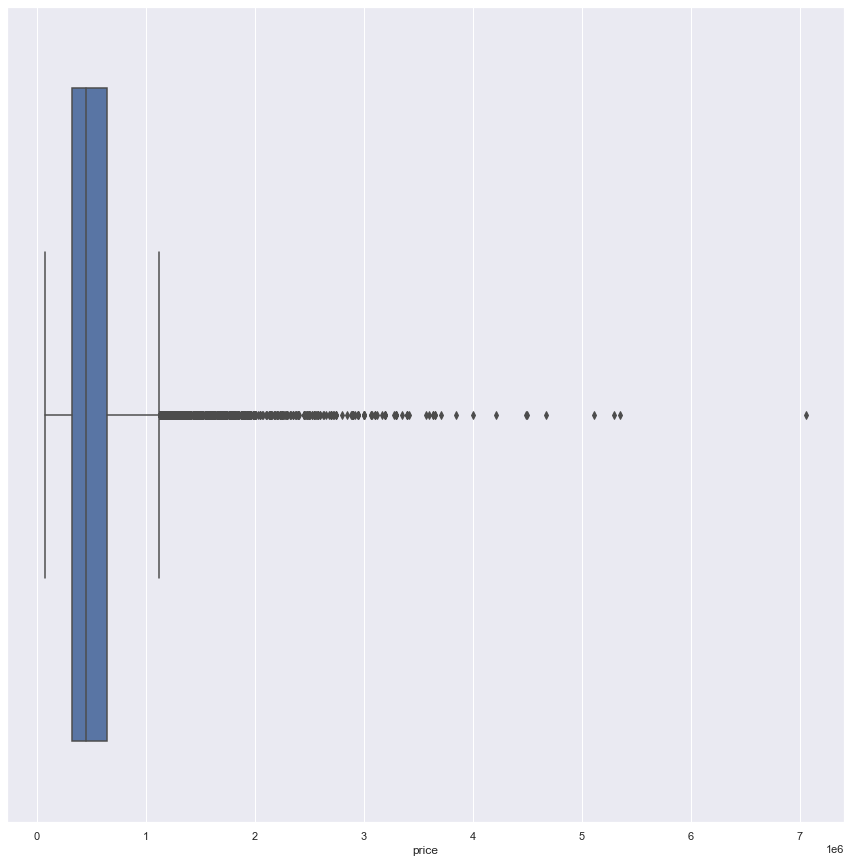

In [742]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x= df_copy["price"])

In [743]:
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_copy['price'].mean()- (iqr*1.5)

upper_limit = df_copy['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(60289.17704289255, 1020439.1770428926)

In [744]:
df_copy = df_copy[df_copy['price'] < upper_limit]

In [745]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19981 non-null  float64
 1   bedrooms       19981 non-null  int64  
 2   bathrooms      19981 non-null  float64
 3   sqft_living    19981 non-null  int64  
 4   sqft_lot       19981 non-null  int64  
 5   floors         19981 non-null  float64
 6   condition      19981 non-null  int64  
 7   grade          19981 non-null  int64  
 8   sqft_above     19981 non-null  int64  
 9   yr_built       19981 non-null  int64  
 10  zipcode        19981 non-null  int64  
 11  lat            19981 non-null  float64
 12  long           19981 non-null  float64
 13  sqft_living15  19981 non-null  int64  
 14  sqft_lot15     19981 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.4 MB


In [746]:
df_copy = df_copy.reset_index()
encoder = OneHotEncoder()
# apply on df
# color_1hot = encoder.fit_transform(df_clean["zipcode"].values.reshape(-1,1))
# color_1hot_df = pd.DataFrame(color_1hot.toarray())
# df_clean = pd.concat([df_clean.drop('zipcode', axis = 1), color_1hot_df], axis = 1)
zipcode_trans = encoder.fit_transform(df['zipcode'].values.reshape(-1,1))
zipcode_trans.todense()
encoder.get_feature_names()
zipcode_df =pd.DataFrame(zipcode_trans.todense(), columns = encoder.get_feature_names())
zipcode_df
df_copy = df_copy.join(zipcode_df)
df_copy

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,221900.0000,3,1.0000,1180,5650,1.0000,3,7,1180,1955,98178,47.5112,-122.2570,1340,5650,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
1,1,538000.0000,3,2.2500,2570,7242,2.0000,3,7,2170,1951,98125,47.7210,-122.3190,1690,7639,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,180000.0000,2,1.0000,770,10000,1.0000,3,6,770,1933,98028,47.7379,-122.2330,2720,8062,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3,604000.0000,4,3.0000,1960,5000,1.0000,5,7,1050,1965,98136,47.5208,-122.3930,1360,5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,4,510000.0000,3,2.0000,1680,8080,1.0000,3,8,1680,1987,98074,47.6168,-122.0450,1800,7503,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [747]:
endog = df_copy["price"]
exog = sm.add_constant(df_copy.drop(['price', 'zipcode'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     511.1
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        00:16:11   Log-Likelihood:            -2.6056e+05
No. Observations:               19981   AIC:                         5.213e+05
Df Residuals:                   19897   BIC:                         5.220e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.283e+07   8.94e+05    -25.532      0.000   -2.46e+07   -2.11e+07
index             0.7449      0.131      5.690      0.000       0.488       1.002
bedrooms      -9386.6480   1124.041     -8.351      0.000   -1.16e+04   -7183.434
bathrooms      2.658e+04   1935.137     13.734      0.000    2.28e+04    3.04e+04
sqft_living      70.1259      2.741     25.584      0.000      64.753      75.499
sqft_lot          0.2568      0.028      9.182      0.000       0.202       0.312
floors         3.069e+04   2128.055     14.423      0.000    2.65e+04    3.49e+04
condition      2.567e+04   1342.133     19.128      0.000     2.3e+04    2.83e+04
grade          7.301e+04   1305.354     55.930      0.000    7.04e+04    7.56e+04
sqft_above       -3.6987      2.692     -1.374      0.169      -8.974       1.577
yr_built      -1915.6324     40.967    -46.760      0.000   -1995.932   -1835.333
lat            5.105e+05   5898.151     86.552      0.000    4.99e+05    5.22e+05
long          -1.782e+04   6797.368     -2.621      0.009   -3.11e+04   -4494.386
sqft_living15    54.2499      2.153     25.201      0.000      50.030      58.469
sqft_lot15       -0.1008      0.043     -2.357      0.018      -0.185      -0.017
x0_98001      -3.308e+05   1.42e+04    -23.231      0.000   -3.59e+05   -3.03e+05
x0_98002      -3.133e+05   1.52e+04    -20.595      0.000   -3.43e+05   -2.83e+05
x0_98003      -3.247e+05   1.43e+04    -22.688      0.000   -3.53e+05   -2.97e+05
x0_98004      -3.261e+05   1.43e+04    -22.789      0.000   -3.54e+05   -2.98e+05
x0_98005      -3.135e+05   1.54e+04    -20.316      0.000   -3.44e+05   -2.83e+05
x0_98006      -3.268e+05   1.38e+04    -23.748      0.000   -3.54e+05      -3e+05
x0_98007       -3.24e+05   1.58e+04    -20.481      0.000   -3.55e+05   -2.93e+05
x0_98008        -3.3e+05   1.44e+04    -22.915      0.000   -3.58e+05   -3.02e+05
x0_98010      -3.377e+05    1.7e+04    -19.829      0.000   -3.71e+05   -3.04e+05
x0_98011      -3.305e+05   1.52e+04    -21.677      0.000    -3.6e+05   -3.01e+05
x0_98014      -3.278e+05   1.64e+04    -19.977      0.000    -3.6e+05   -2.96e+05
x0_98019       -3.25e+05   1.52e+04    -21.321      0.000   -3.55e+05   -2.95e+05
x0_98022      -3.181e+05   1.48e+04    -21.537      0.000   -3.47e+05   -2.89e+05
x0_98023      -3.312e+05   1.38e+04    -24.075      0.000   -3.58e+05   -3.04e+05
x0_98024      -3.441e+05    1.8e+04    -19.064      0.000   -3.79e+05   -3.09e+05
x0_98027      -3.203e+05   1.41e+04    -22.644      0.000   -3.48e+05   -2.93e+05
x0_98028      -3.336e+05   1.45e+04    -22.937      0.000   -3.62e+05   -3.05e+05
x0_98029      -3.314e+05   1.43e+04    -23.110      0.000    -3.6e+05   -3.03e+05
x0_98030      -3.233e+05   1.47e+04    -21.968      0.000   -3.52e+05   -2.94e+05
x0_98031       -3.31e+05   1.44e+04    -22.923   

In [713]:
training_data = df_copy.sample(frac = 0.75, random_state=25)
x_train = training_data.drop('price', axis=1)
y_train = training_data['price']

testing_data = df_copy.drop(training_data.index)
x_test = testing_data.drop('price', axis =1)
y_test = testing_data['price']

In [679]:
# ax = x_train.hist(figsize = (20,18), bins=20)
# plt.show()

In [648]:
# y_train = np.log(y_train)
# y_train.hist()

## Model Construction

### Build a baseline Model

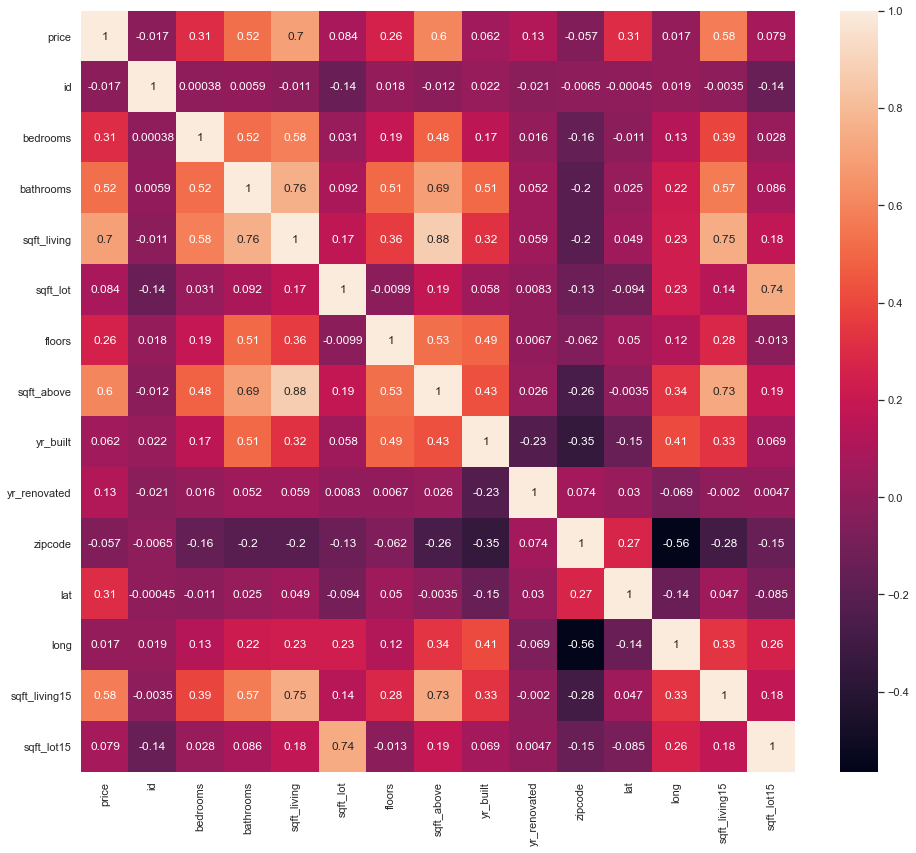

In [649]:
heatmap_data_ori = pd.concat([y_train_ori, x_train_ori], axis=1)
corr = heatmap_data_ori.corr()
sns.set(rc={'figure.figsize':(16, 14)})
sns.heatmap(data=corr, annot=True);

In [650]:
price_corrs = heatmap_data_ori.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price           1.0000
sqft_living     0.6982
sqft_above      0.6043
sqft_living15   0.5771
bathrooms       0.5237
bedrooms        0.3084
lat             0.3051
floors          0.2583
yr_renovated    0.1257
sqft_lot        0.0838
sqft_lot15      0.0790
yr_built        0.0622
zipcode         0.0567
long            0.0172
id              0.0168
Name: price, dtype: float64

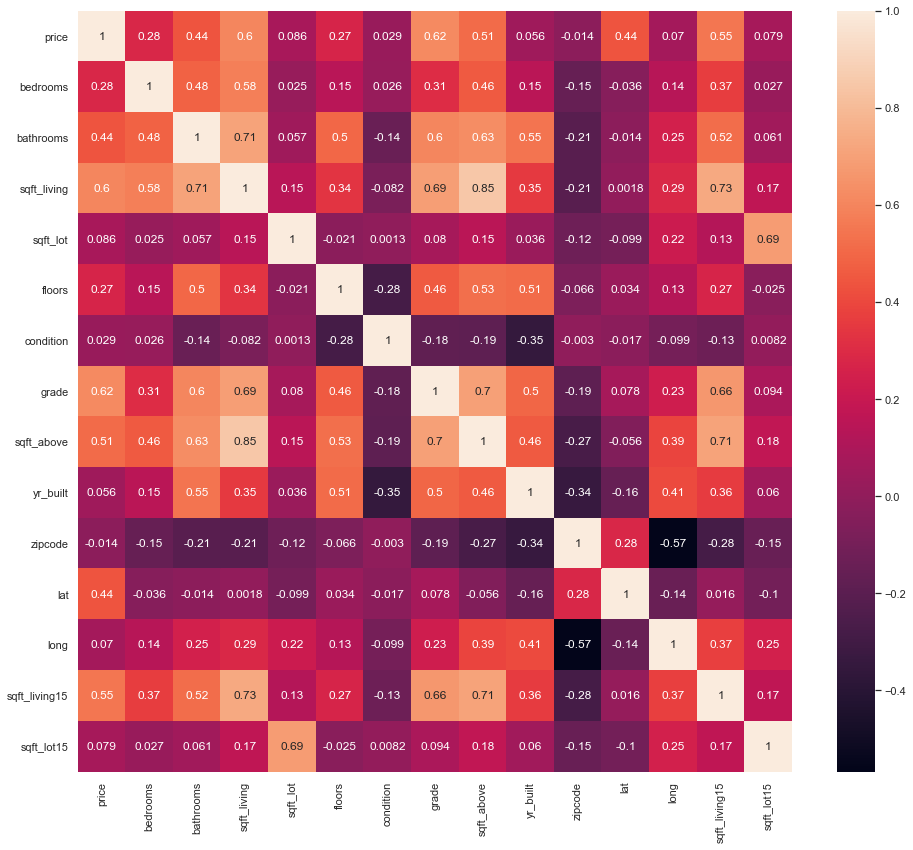

In [651]:
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()
sns.set(rc={'figure.figsize':(16, 14)})
sns.heatmap(data=corr, annot=True);

In [652]:
price_corrs = heatmap_data.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price           1.0000
grade           0.6188
sqft_living     0.6046
sqft_living15   0.5495
sqft_above      0.5145
bathrooms       0.4403
lat             0.4379
bedrooms        0.2831
floors          0.2701
sqft_lot        0.0861
sqft_lot15      0.0791
long            0.0697
yr_built        0.0558
condition       0.0293
zipcode         0.0139
Name: price, dtype: float64

In [653]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14986 entries, 13434 to 11709
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       14986 non-null  int64  
 1   bathrooms      14986 non-null  float64
 2   sqft_living    14986 non-null  int64  
 3   sqft_lot       14986 non-null  int64  
 4   floors         14986 non-null  float64
 5   condition      14986 non-null  int64  
 6   grade          14986 non-null  int64  
 7   sqft_above     14986 non-null  int64  
 8   yr_built       14986 non-null  int64  
 9   zipcode        14986 non-null  int64  
 10  lat            14986 non-null  float64
 11  long           14986 non-null  float64
 12  sqft_living15  14986 non-null  int64  
 13  sqft_lot15     14986 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.7 MB


In [654]:
# house_preds = df[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']]
# house_target = df['price']
# lr = LinearRegression().fit(house_preds, house_target)
# lr.score(house_preds, house_target)
# ## multicollinear problem as 0.88, 0.76, 0.76 are pretty high

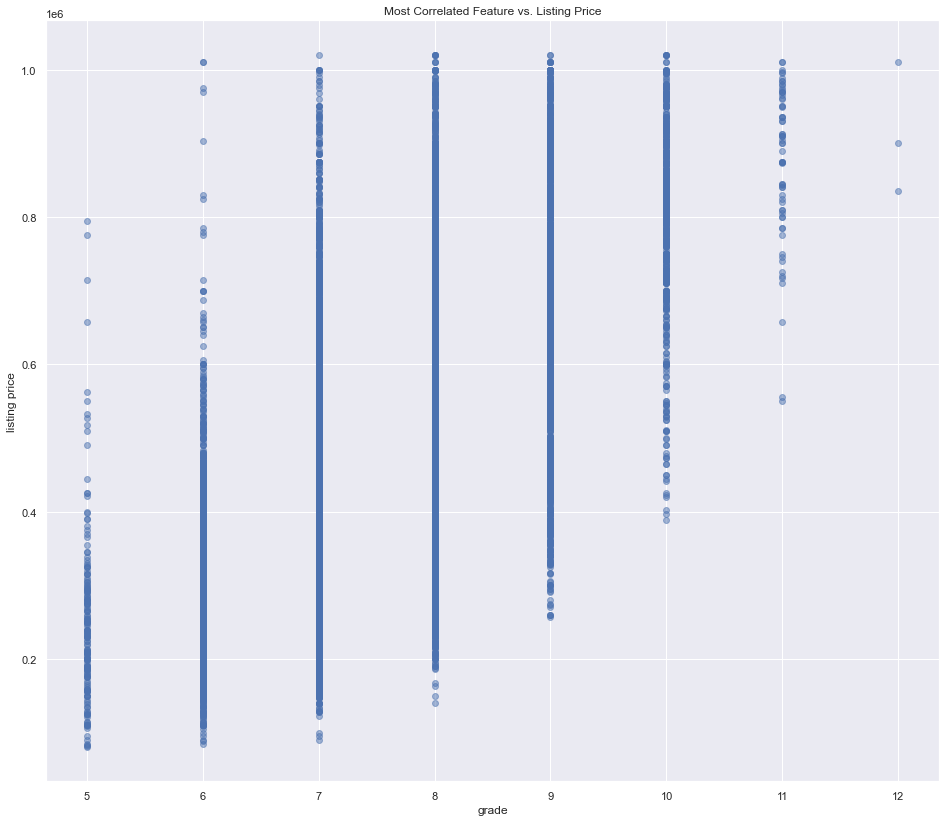

In [655]:
most_correlated_feature = "grade"

fig, ax = plt.subplots()
ax.scatter(x_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [656]:
baseline_model = LinearRegression()

In [657]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.75, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.3854925641762302
Validation score: 0.381568978173713


In [658]:
baseline_scores

{'fit_time': array([0.0029912 , 0.00199485, 0.00099754]),
 'score_time': array([0.00199413, 0.0009973 , 0.00199461]),
 'test_score': array([0.38594642, 0.38254521, 0.3762153 ]),
 'train_score': array([0.37253532, 0.38372508, 0.4002173 ])}

### Model with Only Numeric Features

In [659]:
x_train_numeric = x_train.copy()
x_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
13434,4,1.7500,1880,3720,1.5000,4,7,1880,1924,98109,47.6431,-122.3560,2090,4095
985,4,2.7500,2130,8560,1.0000,3,7,1560,1992,98022,47.1949,-122.0100,2130,8560
3993,4,1.7500,2530,5000,1.5000,5,8,2070,1917,98103,47.6624,-122.3480,1950,3600
10377,4,2.5000,2390,9638,2.0000,3,10,2390,1988,98029,47.5598,-122.0180,2630,9258
847,3,1.7500,4000,11894,1.0000,3,9,2190,1987,98011,47.7738,-122.2030,2530,8650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14381,2,2.0000,1730,4248,2.0000,3,7,1730,1905,98144,47.5933,-122.3080,1380,4000
9093,4,2.5000,2540,6365,2.0000,3,8,1870,2000,98055,47.4608,-122.2150,2290,5942
14099,2,1.0000,1030,4365,1.0000,3,7,1030,1942,98117,47.6875,-122.3870,1420,4268
13858,3,2.5000,1690,1553,2.5000,3,8,1690,2007,98199,47.6443,-122.3850,1910,1553


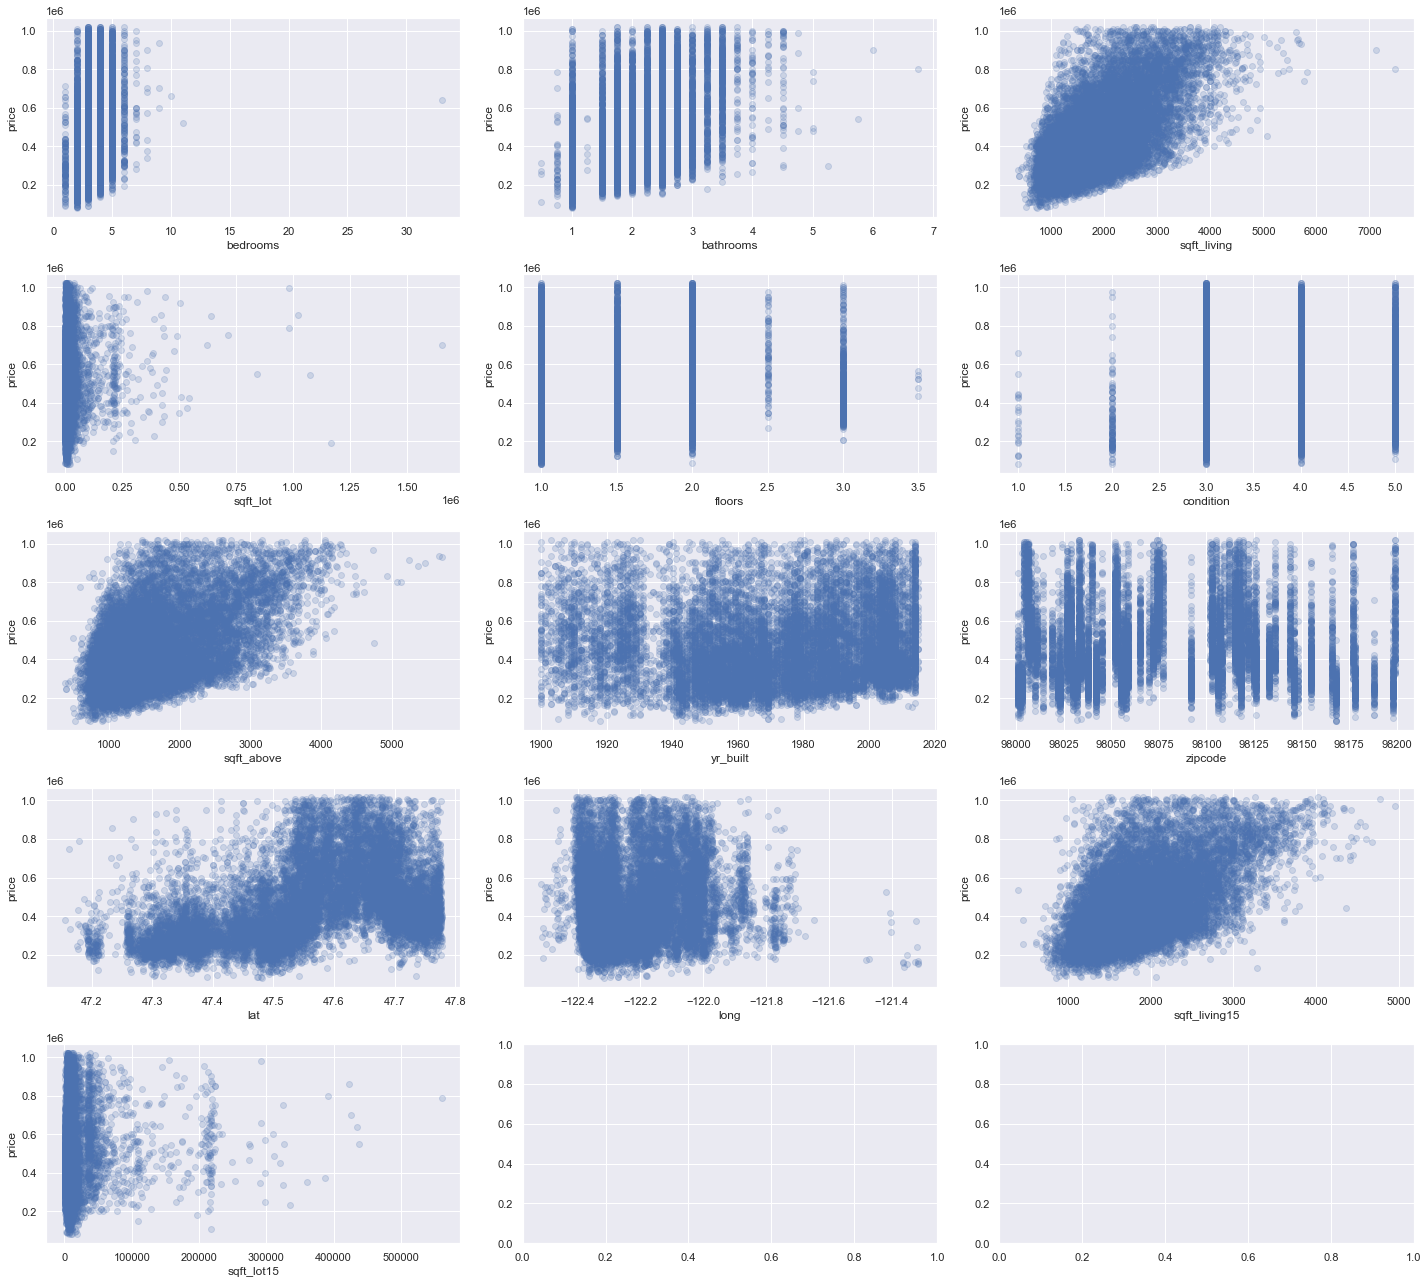

In [660]:
scatterplot_data = x_train_numeric.drop("grade", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 18))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [661]:
## drop id, 
# x_train_second_model = x_train_numeric.drop('id', axis=1).copy()
# x_train_second_model = x_train_second_model.drop('yr_renovated', axis=1).copy()
# x_train_second_model = x_train_second_model.drop('sqft_basement', axis=1).copy()
x_train_second_model = x_train_numeric.copy()

x_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
13434,4,1.7500,1880,3720,1.5000,4,7,1880,1924,98109,47.6431,-122.3560,2090,4095
985,4,2.7500,2130,8560,1.0000,3,7,1560,1992,98022,47.1949,-122.0100,2130,8560
3993,4,1.7500,2530,5000,1.5000,5,8,2070,1917,98103,47.6624,-122.3480,1950,3600
10377,4,2.5000,2390,9638,2.0000,3,10,2390,1988,98029,47.5598,-122.0180,2630,9258
847,3,1.7500,4000,11894,1.0000,3,9,2190,1987,98011,47.7738,-122.2030,2530,8650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14381,2,2.0000,1730,4248,2.0000,3,7,1730,1905,98144,47.5933,-122.3080,1380,4000
9093,4,2.5000,2540,6365,2.0000,3,8,1870,2000,98055,47.4608,-122.2150,2290,5942
14099,2,1.0000,1030,4365,1.0000,3,7,1030,1942,98117,47.6875,-122.3870,1420,4268
13858,3,2.5000,1690,1553,2.5000,3,8,1690,2007,98199,47.6443,-122.3850,1910,1553


In [662]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6806470974003548
Validation score: 0.6756485115111822

Baseline Model
Train score:      0.3854925641762302
Validation score: 0.381568978173713


### select the best combinations of features

In [663]:
sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2261.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        00:04:30   Log-Likelihood:            -1.9550e+05
No. Observations:               14986   AIC:                         3.910e+05
Df Residuals:                   14971   BIC:                         3.911e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.23e+07   1.94e+06     -6.343      0.000   -1.61e+07    -8.5e+06
bedrooms      -1.032e+04   1281.340     -8.053      0.000   -1.28e+04   -7806.677
bathrooms      2.502e+04   2237.618     11.182      0.000    2.06e+04    2.94e+04
sqft_living      72.8692      3.163     23.041      0.000      66.670      79.068
sqft_lot          0.2272      0.030      7.454      0.000       0.167       0.287
floors         3.394e+04   2458.545     13.804      0.000    2.91e+04    3.88e+04
condition      2.449e+04   1553.401     15.767      0.000    2.14e+04    2.75e+04
grade          7.323e+04   1501.576     48.767      0.000    7.03e+04    7.62e+04
sqft_above       -4.6897      3.103     -1.511      0.131     -10.771       1.392
yr_built      -1903.3116     47.213    -40.313      0.000   -1995.855   -1810.769
zipcode        -154.6034     22.038     -7.015      0.000    -197.801    -111.406
lat            5.156e+05   6990.869     73.757      0.000    5.02e+05    5.29e+05
long           -5.09e+04   8707.998     -5.846      0.000    -6.8e+04   -3.38e+04
sqft_living15    52.2912      2.498     20.929      0.000      47.394      57.189
sqft_lot15       -0.0382      0.050     -0.772      0.440      -0.135       0.059
==============================================================================
Omnibus:                     1110.910   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1795.468
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                       4.244   Cond. No.                     2.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [664]:
significant_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                        'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 

In [665]:
third_model = LinearRegression()
x_train_third_model = x_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=x_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6802637191721503
Validation score: 0.6763026597777756

Second Model
Train score:      0.6806470974003548
Validation score: 0.6756485115111822

Baseline Model
Train score:      0.3854925641762302
Validation score: 0.381568978173713


### RFE approach

In [666]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
x_train_for_RFECV = StandardScaler().fit_transform(x_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(x_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
condition: True
grade: True
yr_built: True
zipcode: True
lat: True
long: True
sqft_living15: True


In [667]:
## drop the yr_build variable 
refined_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                    'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 

In [668]:
# fourth_model = LinearRegression()
# x_train_fourth_model = x_train[refined_features]

# fourth_model_scores = cross_validate(
#     estimator=fourth_model,
#     X=x_train_fourth_model,
#     y=y_train,
#     return_train_score=True,
#     cv=splitter
# )
# print("Current Model")
# print("Train score:     ", fourth_model_scores["train_score"].mean())
# print("Validation score:", fourth_model_scores["test_score"].mean())
# print()
# print("Third Model")
# print("Train score:     ", third_model_scores["train_score"].mean())
# print("Validation score:", third_model_scores["test_score"].mean())
# print()
# print("Second Model")
# print("Train score:     ", second_model_scores["train_score"].mean())
# print("Validation score:", second_model_scores["test_score"].mean())
# print()
# print("Baseline Model")
# print("Train score:     ", baseline_scores["train_score"].mean())
# print("Validation score:", baseline_scores["test_score"].mean())

In [669]:
# from itertools import combinations

# features = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_lot', 'floors', 'condition',
#             'sqft_basement', 'yr_built', 'zipcode', 'lat', 'sqft_living15'] 

# # Make a dataframe to hold the results (not strictly necessary
# # but it makes the output easier to read)
# results_df = pd.DataFrame(columns=features)

# # Selecting just piece_count
# results_df = results_df.append({
#     "train_score": baseline_scores["train_score"].mean(),
#     "val_score": baseline_scores["test_score"].mean()
# }, ignore_index=True)

# # Selecting 1 additional feature
# for feature in features[1:]:
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     # Note: this technique of appending to a df is quite inefficient
#     # Here it works because it's only happening 6 times, but avoid
#     # doing this for a whole dataset
#     results_df = results_df.append({
#         feature: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
# # Selecting 2 additional features
# for (feature1, feature2) in list(combinations(features[1:], 2)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
# for (feature1, feature2, feature3) in list(combinations(features[1:], 3)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)  
    
# for (feature1, feature2, feature3, feature4) in list(combinations(features[1:], 4)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)   
    
# for (feature1, feature2, feature3, feature4, feature5) in list(combinations(features[1:], 5)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)  
    
# for (feature1, feature2, feature3, feature4, feature5, feature6) in list(combinations(features[1:], 6)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)  
    
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7) in list(combinations(features[1:], 7)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)  
    
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8) in list(combinations(features[1:], 8)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         feature8: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)  
    
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9) in list(combinations(features[1:], 9)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         feature8: "Yes",
#         feature9: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)   
    
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10) in list(combinations(features[1:], 10)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         feature8: "Yes",
#         feature9: "Yes",
#         feature10: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
# for (feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11) in list(combinations(features[1:], 11)):
#     scores = cross_validate(
#         estimator=third_model,
#         X=x_train[["sqft_living", feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11]],
#         y=y_train,
#         return_train_score=True,
#         cv=splitter
#     )
#     results_df = results_df.append({
#         feature1: "Yes",
#         feature2: "Yes",
#         feature3: "Yes",
#         feature4: "Yes",
#         feature5: "Yes",
#         feature6: "Yes",
#         feature7: "Yes",
#         feature8: "Yes",
#         feature9: "Yes",
#         feature10: "Yes",
#         feature11: "Yes",
#         "train_score": scores["train_score"].mean(),
#         "val_score": scores["test_score"].mean()
#     }, ignore_index=True)
    
    
# # Including all 3 additional features
# results_df = results_df.append({
#     "bedrooms": "Yes", "bathrooms": "Yes", "sqft_living": "Yes", "grade": "Yes", "sqft_lot": "Yes", "floors": "Yes",
#     "condition": "Yes", "sqft_basement":"Yes", "yr_built": "Yes", "zipcode":"Yes", "lat": "Yes",  "sqft_living15": "Yes",
#     "train_score": third_model_scores["train_score"].mean(),
#     "val_score": third_model_scores["test_score"].mean()
# }, ignore_index=True)

# # Fill in remaining values where appropriate
# results_df["sqrt_living"] = "Yes"
# results_df.fillna("No", inplace=True)

# results_df

In [671]:
# results_df.sort_values(ascending=False, by='val_score')

In [715]:
x_train

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
12468,13434,4,1.7500,1880,3720,1.5000,4,7,1880,1924,98109,47.6431,-122.3560,2090,4095,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
915,985,4,2.7500,2130,8560,1.0000,3,7,1560,1992,98022,47.1949,-122.0100,2130,8560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3705,3993,4,1.7500,2530,5000,1.5000,5,8,2070,1917,98103,47.6624,-122.3480,1950,3600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9643,10377,4,2.5000,2390,9638,2.0000,3,10,2390,1988,98029,47.5598,-122.0180,2630,9258,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
781,847,3,1.7500,4000,11894,1.0000,3,9,2190,1987,98011,47.7738,-122.2030,2530,8650,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,14381,2,2.0000,17

In [716]:
# best_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
#                  'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'] 
x_train_final = x_train
x_test_final = x_test

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(x_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(x_test_final, y_test)

0.6841489333157431

In [613]:
# y = y_train
# X = x_train[best_features]

# x_train, x_test, y_train, y_test = train_test_split(X, np.log(y), 
#                                                    test_size = .75,
#                                                    random_state = 25)

# lr = LinearRegression()
# lr.fit(x_train, y_train)
# lr.score(x_train, y_train)

0.6764010184070488

In [614]:
# lr.score(x_test, y_test)

0.6683143239957483

In [675]:
mean_squared_error(y_test, final_model.predict(x_test_final), squared=False)
## not a good number

109985.7535723339

In [676]:
print(pd.Series(final_model.coef_, index=x_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms        -10293.5484
bathrooms        25699.5889
sqft_living         69.7770
sqft_lot             0.2104
floors           32271.0475
condition        24636.9781
grade            72973.9451
yr_built         -1903.9648
zipcode           -153.5668
lat             517093.3022
long            -54070.0081
sqft_living15       51.6577
Name: Coefficients, dtype: float64

Intercept: -12851308.22292317


## Violation Tests

### Invvestigating Linearity

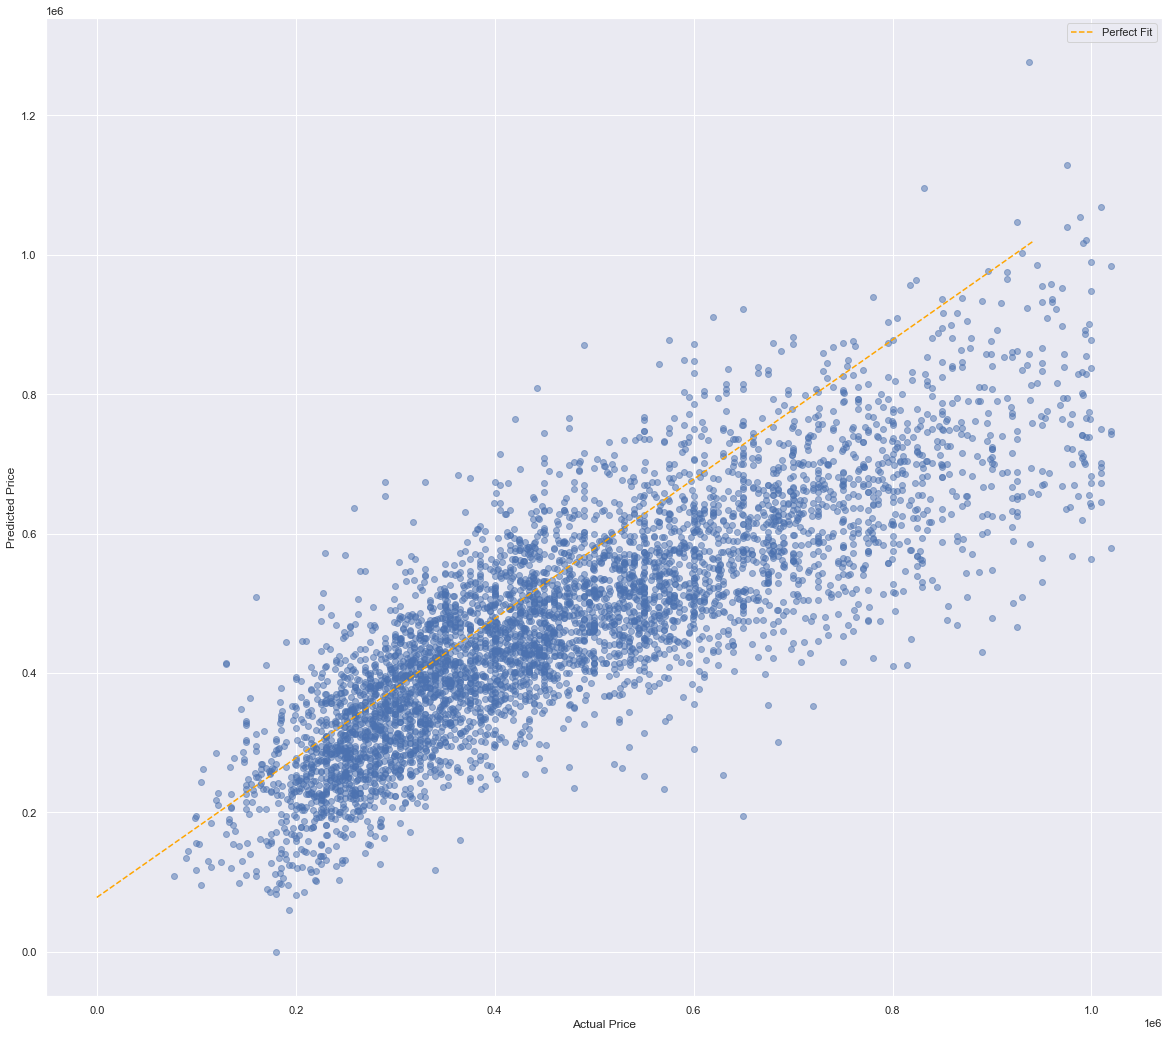

In [288]:
preds = final_model.predict(x_test_final)
fig, ax = plt.subplots(figsize=(20, 18))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
# ax.set_facecolor("white")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## looks like we have a linear relationship

### Investigating Normality

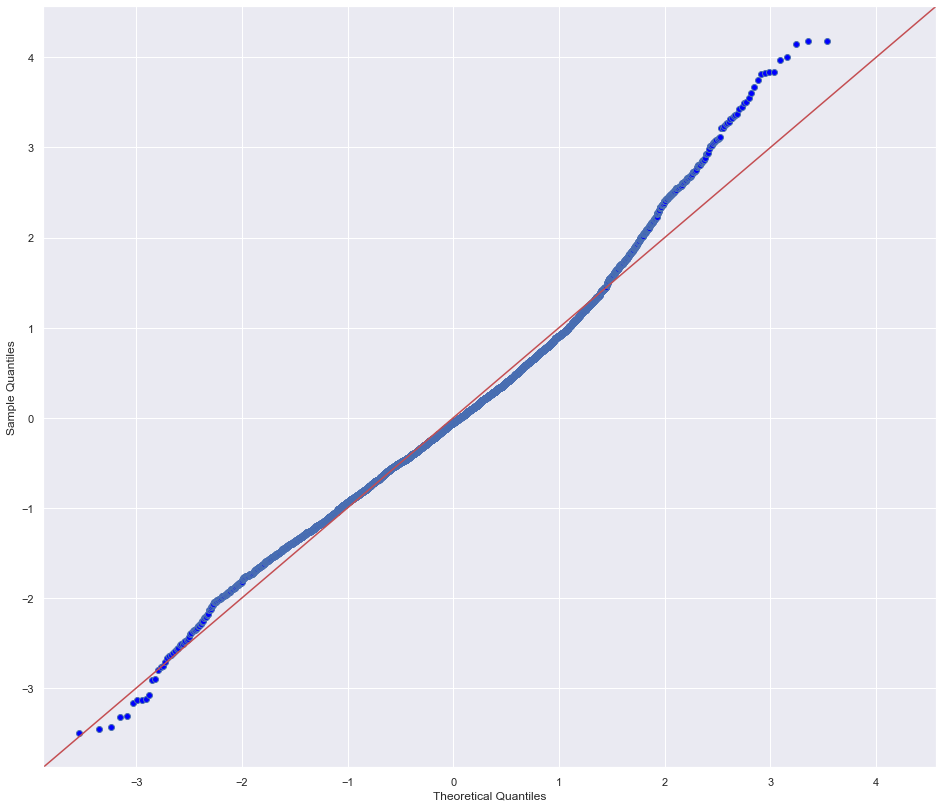

In [289]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

## Outliers violating normality

###  Investigating Multicollinearity

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train_final.values, i) for i in range(x_train_final.shape[1])]
pd.Series(vif, index=x_train_final.columns, name="Variance Inflation Factor")

## there is multicollinearity problem

bedrooms             23.1075
bathrooms            26.9384
sqft_living          32.3357
sqft_lot              1.2074
floors               13.7183
condition            33.8501
grade               151.5761
yr_built           9087.2611
zipcode         1532302.6716
lat              129460.2793
long            1285374.6860
sqft_living15        28.1269
Name: Variance Inflation Factor, dtype: float64

### Investigating Homoscedasticity

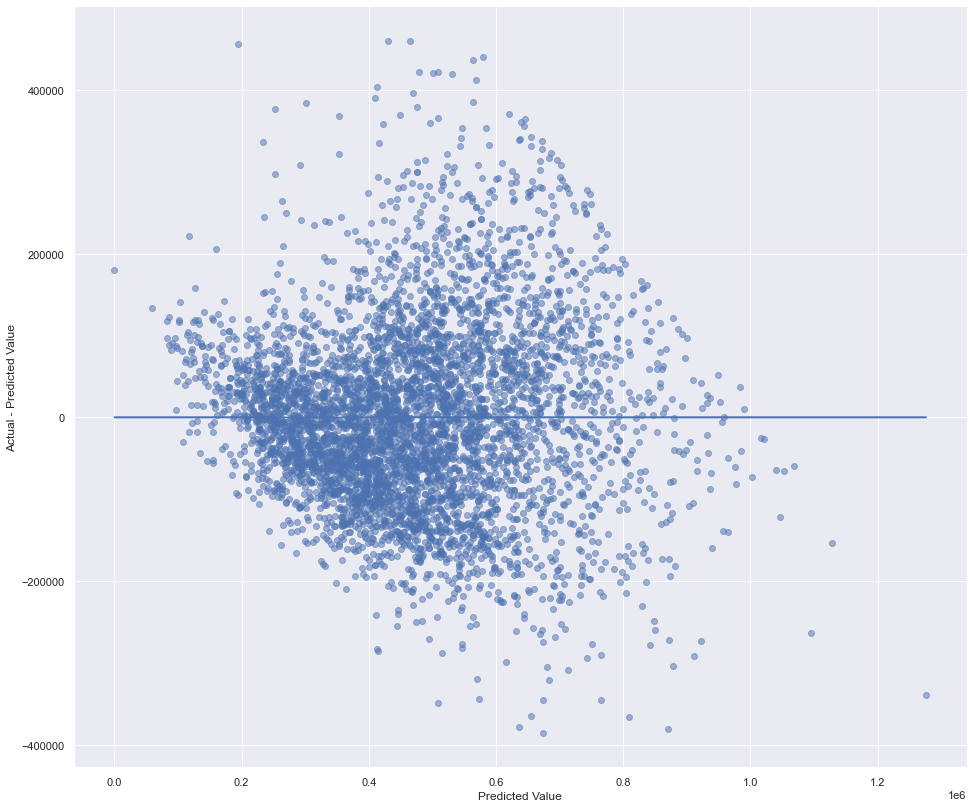

In [292]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(x_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## violating homoscedasticity